In [1]:
# import dependency 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from pandas.io.json import json_normalize
import json
import folium
import plotly as py
import calendar
import time
import datetime
from datetime import datetime
from datetime import date

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
rcParams['figure.figsize'] = 12,7
import seaborn as sns
sns.set()

In [3]:
# read to csv
df= pd.read_csv('mapdataall.csv')
df.head()

,incident_name,incident_is_final,incident_date_last_update,incident_date_created,incident_administrative_unit,incident_administrative_unit_url,incident_county,incident_location,incident_acres_burned,incident_containment,...,incident_type,incident_id,incident_url,incident_date_extinguished,incident_dateonly_extinguished,incident_dateonly_created,is_active,calfire_incident,notification_desired,between
0,Pala Fire,True,9/16/2020 14:07,5/24/2009 14:56,CAL FIRE San Diego Unit,NaN,San Diego,"Hwy 76 and Pala Temecula, northwest of Pala",122,100,...,Wildfire,8f61f461-552d-4538-b186-35ab030da416,https://www.fire.ca.gov/incidents/2009/5/24/pa...,5/25/2009 0:00,5/25/2009,5/24/2009,N,True,False,1
1,River Fire,True,2/28/2013 20:00,2/24/2013 8:16,CAL FIRE San Bernardino Unit,NaN,Inyo,"south of Narrow Gauge Rd & north of Hwy 136, e...",406,100,...,NaN,094719ba-a47b-4abb-9ec5-a506b2b9fd23,https://www.fire.ca.gov/incidents/2013/2/24/ri...,2/28/2013 20:00,2/28/2013,2/24/2013,N,True,False,4
2,Fawnskin Fire,True,4/22/2013 9:00,4/20/2013 17:30,San Bernardino National Forest,NaN,San Bernardino,"west of Delamar Mountain, north of the communi...",30,100,...,NaN,58f89ff8-bd3e-4355-b1c0-8fa05c747d3f,https://www.fire.ca.gov/incidents/2013/4/20/fa...,4/22/2013 9:00,4/22/2013,4/20/2013,N,False,False,2
3,Gold Fire,True,5/1/2013 7:00,4/30/2013 12:59,CAL FIRE Madera-Mariposa-Merced Unit,NaN,Madera,Between Road 210 and Road 200 near Fine Gold C...,274,100,...,NaN,357ffc13-bef9-48eb-810f-c5de851972eb,https://www.fire.ca.gov/incidents/2013/4/30/go...,5/1/2013 7:00,5/1/2013,4/30/2013,N,True,False,1
4,Silverado Fire,True,5/1/2013 17:15,4/30/2013 23:44,CAL FIRE Sonoma-Lake-Napa Unit,NaN,Napa,"7300 block of Silverado Trail, north of Napa",75,100,...,NaN,d8d1c943-7b5d-4885-9043-f41075d6eded,https://www.fire.ca.gov/incidents/2013/4/30/si...,5/1/2013 17:15,5/1/2013,4/30/2013,N,True,False,1


In [8]:
# https://www.ncdc.noaa.gov/cag/
# https://aqs.epa.gov/aqsweb/airdata/download_files.html#Annual

temp = pd.read_csv('temp.change.csv')
temp

,County,Temp,Year
0,Alameda,59.5,2013
1,Alameda,62.0,2014
2,Alameda,61.1,2015
3,Alameda,60.4,2016
4,Alameda,60.5,2017
...,...,...,...
401,Yuba,63.0,2015
402,Yuba,61.7,2016
403,Yuba,62.3,2017
404,Yuba,62.0,2018


In [13]:
# identify columns
df.keys()

Index(['incident_name', 'incident_is_final', 'incident_date_last_update',
       'incident_date_created', 'incident_administrative_unit',
       'incident_administrative_unit_url', 'incident_county',
       'incident_location', 'incident_acres_burned', 'incident_containment',
       'incident_control', 'incident_cooperating_agencies',
       'incident_longitude', 'incident_latitude', 'incident_type',
       'incident_id', 'incident_url', 'incident_date_extinguished',
       'incident_dateonly_extinguished', 'incident_dateonly_created',
       'is_active', 'calfire_incident', 'notification_desired', 'between'],
      dtype='object')

In [14]:
# rename colums
fire = df[['incident_name', 'incident_administrative_unit',
       'incident_county',
       'incident_location', 'incident_acres_burned', 
        'incident_cooperating_agencies',
       'incident_longitude', 'incident_latitude',
        'incident_dateonly_extinguished', 'incident_dateonly_created', 'between']]
fire.columns= (['Incident Name', 'Admin Unit',
       'County','Location', 'Acres Burned', 
        'Cooperating Agencies','Lon', 'Lat',
        'Extinguished', 'Started', 'Days Lasted'])
fire

,Incident Name,Admin Unit,County,Location,Acres Burned,Cooperating Agencies,Lon,Lat,Extinguished,Started,Days Lasted
0,Pala Fire,CAL FIRE San Diego Unit,San Diego,"Hwy 76 and Pala Temecula, northwest of Pala",122,CAL FIRE San Diego Unit,-117.076600,33.363400,5/25/2009,5/24/2009,1
1,River Fire,CAL FIRE San Bernardino Unit,Inyo,"south of Narrow Gauge Rd & north of Hwy 136, e...",406,"CAL FIRE San Bernardino Unit, Inyo County Sher...",-118.016510,36.602575,2/28/2013,2/24/2013,4
2,Fawnskin Fire,San Bernardino National Forest,San Bernardino,"west of Delamar Mountain, north of the communi...",30,San Bernardino National Forest,-116.941311,34.288877,4/22/2013,4/20/2013,2
3,Gold Fire,CAL FIRE Madera-Mariposa-Merced Unit,Madera,Between Road 210 and Road 200 near Fine Gold C...,274,CAL FIRE Madera-Mariposa-Merced Unit,-119.635004,37.116295,5/1/2013,4/30/2013,1
4,Silverado Fire,CAL FIRE Sonoma-Lake-Napa Unit,Napa,"7300 block of Silverado Trail, north of Napa",75,CAL FIRE Sonoma-Lake-Napa Unit,-122.350844,38.441792,5/1/2013,4/30/2013,1
...,...,...,...,...,...,...,...,...,...,...,...
1725,Silverado Fire,CAL FIRE & Orange County Fire Authority and Or...,Orange,Off the 241 in the Irvine area,12466,Orange County Fire Authority,-117.657190,33.736140,11/7/2020,10/26/2020,12
1726,Point Fire (Placer County),USFS El Dorado National Forest,Placer,"Nevada Point Rd and Long Creek Rd, east of For...",0,USFS El Dorado National Forest,-120.488892,39.009454,11/9/2020,10/26/2020,14
1727,Blue Ridge Fire,CAL FIRE & Orange County Fire Authority,Orange,North of the 91 in the Yorba Linda and Chino H...,13964,Orange County Fire Authority,-117.675067,33.877257,11/7/2020,10/26/2020,12
1728,Cypress Fire,San Bernardino County Fire Department,"Riverside, San Bernardino","Sierra Ave and Riverside County Line, North o...",150,"CAL FIRE / Riverside County Fire , San Bernard...",-117.514760,34.033430,NaN,11/1/2020,0


In [15]:
# add new columns and extract month and year
s= fire.Started.to_list()
e= fire.Extinguished.to_list()
StartMonth= ''
EndMonth=''
StartYear= ''
EndYear= ''
fire['StartMonth']= pd.DatetimeIndex(s).month
fire['EndMonth']= pd.to_datetime(e).month
fire['StartYear']= pd.DatetimeIndex(s).year
fire['EndYear']= pd.DatetimeIndex(e).year
fire.head()

,Incident Name,Admin Unit,County,Location,Acres Burned,Cooperating Agencies,Lon,Lat,Extinguished,Started,Days Lasted,StartMonth,EndMonth,StartYear,EndYear
0,Pala Fire,CAL FIRE San Diego Unit,San Diego,"Hwy 76 and Pala Temecula, northwest of Pala",122,CAL FIRE San Diego Unit,-117.076600,33.363400,5/25/2009,5/24/2009,1,5,5.0,2009,2009.0
1,River Fire,CAL FIRE San Bernardino Unit,Inyo,"south of Narrow Gauge Rd & north of Hwy 136, e...",406,"CAL FIRE San Bernardino Unit, Inyo County Sher...",-118.016510,36.602575,2/28/2013,2/24/2013,4,2,2.0,2013,2013.0
2,Fawnskin Fire,San Bernardino National Forest,San Bernardino,"west of Delamar Mountain, north of the communi...",30,San Bernardino National Forest,-116.941311,34.288877,4/22/2013,4/20/2013,2,4,4.0,2013,2013.0
3,Gold Fire,CAL FIRE Madera-Mariposa-Merced Unit,Madera,Between Road 210 and Road 200 near Fine Gold C...,274,CAL FIRE Madera-Mariposa-Merced Unit,-119.635004,37.116295,5/1/2013,4/30/2013,1,4,5.0,2013,2013.0
4,Silverado Fire,CAL FIRE Sonoma-Lake-Napa Unit,Napa,"7300 block of Silverado Trail, north of Napa",75,CAL FIRE Sonoma-Lake-Napa Unit,-122.350844,38.441792,5/1/2013,4/30/2013,1,4,5.0,2013,2013.0


In [16]:
# change from float to int
fire.EndMonth = fire.EndMonth.fillna(0)
fire.EndMonth = fire.EndMonth.astype(int)
fire.EndYear = fire.EndYear.fillna(0)
fire.EndYear = fire.EndYear.astype(int)

In [17]:
fire.head()

,Incident Name,Admin Unit,County,Location,Acres Burned,Cooperating Agencies,Lon,Lat,Extinguished,Started,Days Lasted,StartMonth,EndMonth,StartYear,EndYear
0,Pala Fire,CAL FIRE San Diego Unit,San Diego,"Hwy 76 and Pala Temecula, northwest of Pala",122,CAL FIRE San Diego Unit,-117.076600,33.363400,5/25/2009,5/24/2009,1,5,5,2009,2009
1,River Fire,CAL FIRE San Bernardino Unit,Inyo,"south of Narrow Gauge Rd & north of Hwy 136, e...",406,"CAL FIRE San Bernardino Unit, Inyo County Sher...",-118.016510,36.602575,2/28/2013,2/24/2013,4,2,2,2013,2013
2,Fawnskin Fire,San Bernardino National Forest,San Bernardino,"west of Delamar Mountain, north of the communi...",30,San Bernardino National Forest,-116.941311,34.288877,4/22/2013,4/20/2013,2,4,4,2013,2013
3,Gold Fire,CAL FIRE Madera-Mariposa-Merced Unit,Madera,Between Road 210 and Road 200 near Fine Gold C...,274,CAL FIRE Madera-Mariposa-Merced Unit,-119.635004,37.116295,5/1/2013,4/30/2013,1,4,5,2013,2013
4,Silverado Fire,CAL FIRE Sonoma-Lake-Napa Unit,Napa,"7300 block of Silverado Trail, north of Napa",75,CAL FIRE Sonoma-Lake-Napa Unit,-122.350844,38.441792,5/1/2013,4/30/2013,1,4,5,2013,2013


In [18]:
# # Convert month to month name
fire['StartMonth']=fire.StartMonth.apply(lambda x: calendar.month_name[x])
fire['EndMonth']=fire.EndMonth.apply(lambda x: calendar.month_name[x])
# extract years
fire = fire[(fire.StartYear>=2013)]
y13 = fire[(fire.StartYear ==2013)]
y14 = fire[(fire.StartYear ==2014)]
y15 = fire[(fire.StartYear ==2015)]
y16 = fire[(fire.StartYear ==2016)]
y17 = fire[(fire.StartYear ==2017)]
y18 = fire[(fire.StartYear ==2018)]
y19 = fire[(fire.StartYear ==2019)]
y20 = fire[(fire.StartYear ==2020)]

In [19]:
s= y20["Acres Burned"].sum()
print(f'The total acres burned in the year 2020 is {s}.')

The total acres burned in the year 2020 is 1455738.


In [20]:
#reset index .reset_index(drop=True)
# Keep and reset index .reset_index(inplace=True, drop=True)
# If you don't want to reassign .reset_index(drop=True, inplace=True)
y13.reset_index(drop=True)

,Incident Name,Admin Unit,County,Location,Acres Burned,Cooperating Agencies,Lon,Lat,Extinguished,Started,Days Lasted,StartMonth,EndMonth,StartYear,EndYear
0,River Fire,CAL FIRE San Bernardino Unit,Inyo,"south of Narrow Gauge Rd & north of Hwy 136, e...",406,"CAL FIRE San Bernardino Unit, Inyo County Sher...",-118.016510,36.602575,2/28/2013,2/24/2013,4,February,February,2013,2013
1,Fawnskin Fire,San Bernardino National Forest,San Bernardino,"west of Delamar Mountain, north of the communi...",30,San Bernardino National Forest,-116.941311,34.288877,4/22/2013,4/20/2013,2,April,April,2013,2013
2,Gold Fire,CAL FIRE Madera-Mariposa-Merced Unit,Madera,Between Road 210 and Road 200 near Fine Gold C...,274,CAL FIRE Madera-Mariposa-Merced Unit,-119.635004,37.116295,5/1/2013,4/30/2013,1,April,May,2013,2013
3,Silverado Fire,CAL FIRE Sonoma-Lake-Napa Unit,Napa,"7300 block of Silverado Trail, north of Napa",75,CAL FIRE Sonoma-Lake-Napa Unit,-122.350844,38.441792,5/1/2013,4/30/2013,1,April,May,2013,2013
4,Panther Fire,CAL FIRE Butte Unit,Tehama,"140K3 Line, 8 miles northwest of Butte Meadows",6965,"CAL FIRE Butte Unit, CAL FIRE, USFS (Lassen an...",-121.595555,40.190062,5/9/2013,5/1/2013,8,May,May,2013,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Retek Fire,CAL FIRE Mendocino Unit,Mendocino,"Off Hwy 101 at Henry Station Rd, north of Hopland",82,CAL FIRE Mendocino Unit,-123.147800,39.044200,11/22/2013,11/22/2013,0,November,November,2013,2013
137,McCabe Fire,CAL FIRE Sonoma-Lake-Napa Unit,Sonoma,"The Geysers area, 10 miles northeast of Geyser...",3505,"CAL FIRE Sonoma-Lake-Napa Unit, CAL FIRE, Napa...",-122.849800,38.816700,11/27/2013,11/22/2013,5,November,November,2013,2013
138,Bruner Fire,CAL FIRE Sonoma-Lake-Napa Unit,Lake,"Off Bruner Drive & Al Drive, Clearlake Oaks",50,CAL FIRE Sonoma-Lake-Napa Unit,-122.765600,39.044800,11/24/2013,11/23/2013,1,November,November,2013,2013
139,Dam Fire,CAL FIRE Sonoma-Lake-Napa Unit,Lake,"Off Dam Rd, southeast of Clear Lake",23,CAL FIRE Sonoma-Lake-Napa Unit,-122.581800,38.928900,11/24/2013,11/23/2013,1,November,November,2013,2013


In [21]:
fire.head()

,Incident Name,Admin Unit,County,Location,Acres Burned,Cooperating Agencies,Lon,Lat,Extinguished,Started,Days Lasted,StartMonth,EndMonth,StartYear,EndYear
1,River Fire,CAL FIRE San Bernardino Unit,Inyo,"south of Narrow Gauge Rd & north of Hwy 136, e...",406,"CAL FIRE San Bernardino Unit, Inyo County Sher...",-118.016510,36.602575,2/28/2013,2/24/2013,4,February,February,2013,2013
2,Fawnskin Fire,San Bernardino National Forest,San Bernardino,"west of Delamar Mountain, north of the communi...",30,San Bernardino National Forest,-116.941311,34.288877,4/22/2013,4/20/2013,2,April,April,2013,2013
3,Gold Fire,CAL FIRE Madera-Mariposa-Merced Unit,Madera,Between Road 210 and Road 200 near Fine Gold C...,274,CAL FIRE Madera-Mariposa-Merced Unit,-119.635004,37.116295,5/1/2013,4/30/2013,1,April,May,2013,2013
4,Silverado Fire,CAL FIRE Sonoma-Lake-Napa Unit,Napa,"7300 block of Silverado Trail, north of Napa",75,CAL FIRE Sonoma-Lake-Napa Unit,-122.350844,38.441792,5/1/2013,4/30/2013,1,April,May,2013,2013
5,Panther Fire,CAL FIRE Butte Unit,Tehama,"140K3 Line, 8 miles northwest of Butte Meadows",6965,"CAL FIRE Butte Unit, CAL FIRE, USFS (Lassen an...",-121.595555,40.190062,5/9/2013,5/1/2013,8,May,May,2013,2013


In [159]:
fire.dtypes

Incident Name            object
Admin Unit               object
County                   object
Location                 object
Acres Burned              int64
Cooperating Agencies     object
Lon                     float64
Lat                     float64
Extinguished             object
Started                  object
Days Lasted               int64
StartMonth               object
EndMonth                 object
StartYear                 int64
EndYear                   int32
dtype: object

In [66]:
days = fire[['StartYear', 'Days Lasted']]
des = days['Days Lasted'].describe()

# dmon = days.groupby('StartYear')['Days Lasted'].sum().sort_values(ascending=False)
# dmon

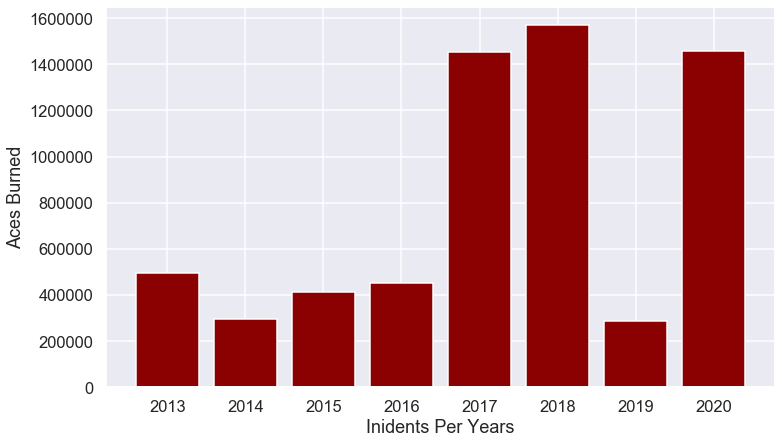

In [67]:
#setting index from a column .set_index('StartYear')
burn = fire[['StartYear','StartMonth', 'Acres Burned']]
burn

#sum by year
year = burn.groupby('StartYear')['Acres Burned'].sum().sort_values(ascending=False)
year

plt.bar(year.index.values, year.values, color ='darkred')
plt.xticks(rotation="vertical")
plt.xticks(rotation=0)
plt.xlabel('Inidents Per Years')
plt.ylabel('Aces Burned')
plt.savefig("Fig8.png", format='png')

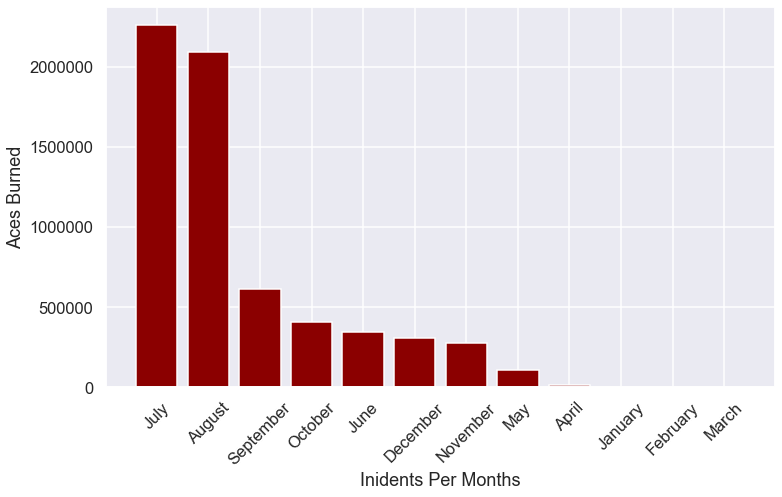

In [68]:
#sum by year
month = burn.groupby('StartMonth')['Acres Burned'].sum().sort_values(ascending=False)
month
plt.bar(month.index.values, month.values, color ='darkred')
plt.xticks(rotation=45)
plt.xlabel('Inidents Per Months')
plt.ylabel('Aces Burned')
plt.savefig("Fig7.png", format='png')

In [163]:
# import matplotlib.pyplot as plt
# import numpy as npplt
# # using some dummy data for this example
# xs = np.arange(0,10,1)
# ys = np.random.normal(loc=3, scale=0.4, size=10)
# plt.bar(xs,ys)
# # zip joins x and y coordinates in pairs
# for x,y in zip(xs,ys):    
#     label = "{:.2f}".format(y)    
#     plt.annotate(label, # this is the text
#     (x,y), # this is the point to label
#     textcoords="offset points", # how to position the text
#     xytext=(0,10), # distance from text to points (x,y)
#     ha='center') # horizontal alignment can be left, right or centerplt.show()

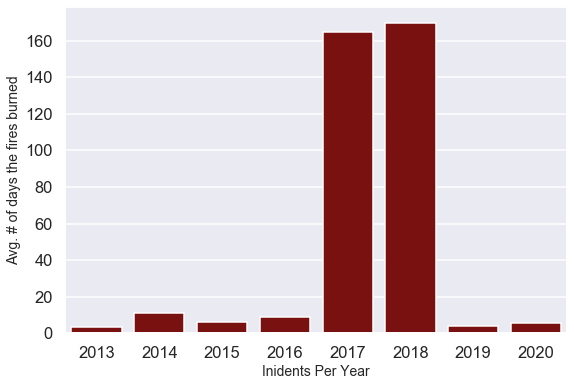

In [69]:
fire[['StartYear', 'Days Lasted']].dropna()
# bigger plot elements suitable for giving talks
sns.set_context('talk')
# set figure size
plt.figure(figsize=(9,6))
# Time series plot with Seaborn lineplot()
sns.barplot(x='StartYear', y='Days Lasted',
            data =fire, ci= None, color= 'darkred')
# axis labels
# plt.xticks(rotation=45)
plt.xlabel("Inidents Per Year", size=14)
plt.ylabel("Avg. # of days the fires burned", size=14)
# save image as PNG file
plt.savefig("Fig1.png",
                    format='png',
                    dpi=150)

In [165]:
# x = ["A", "B", "C", "D"]
# y = [1, 2, 3, 4]
# plt.barh(x, y)for index, value in enumerate(y):
#     plt.text(value, index, str(value))

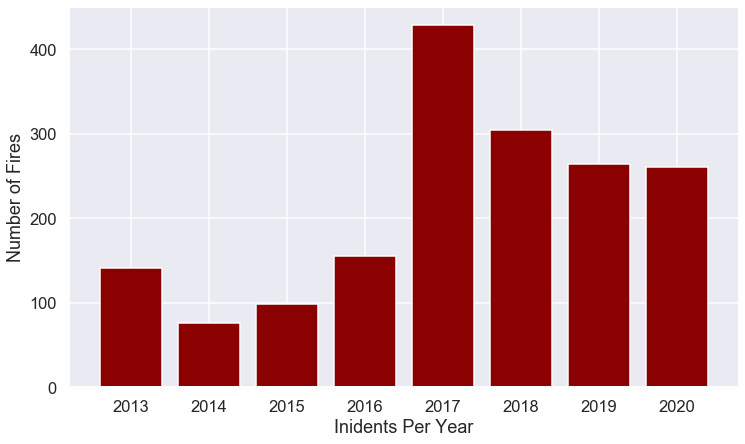

<Figure size 864x504 with 0 Axes>

In [70]:
b = fire.StartYear.value_counts()
b
plt.bar(b.index.values,b.values, color= 'darkred')
plt.xticks(rotation="vertical")
plt.xticks(rotation=0)
plt.xlabel('Inidents Per Year')
plt.ylabel('Number of Fires')
plt.show()
plt.savefig("Fig2.png", format='png')
# x=b.index.values
# y=b.values
# plt.barh(x, y)
# for index, value in enumerate(y):
#     plt.text(value, index, str(value))

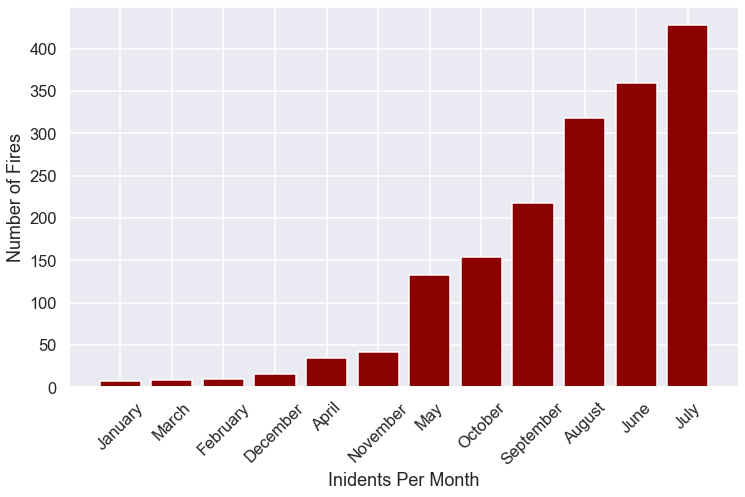

In [71]:
m = fire.StartMonth.value_counts()
m= m.sort_values(ascending=True)
plt.bar(m.index.values,m.values, color= 'darkred')
plt.xticks(rotation="vertical")
plt.xticks(rotation=45)
plt.xlabel('Inidents Per Month')
plt.ylabel('Number of Fires')
plt.savefig("Fig3.png", format='png')

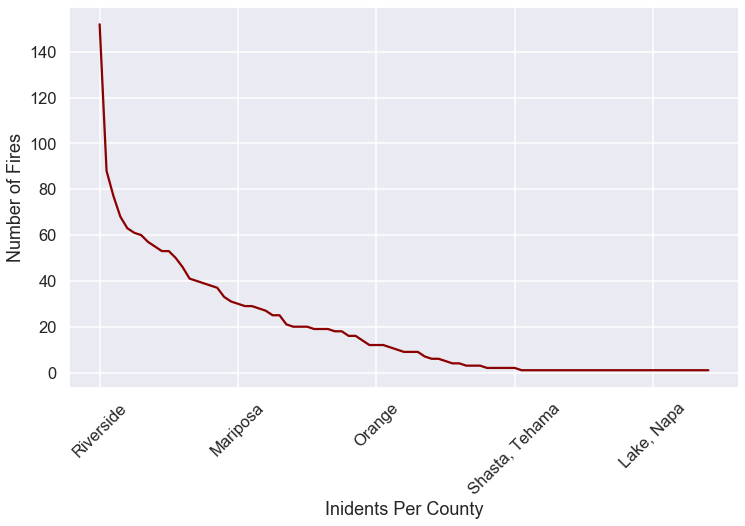

In [72]:
c= fire.County.value_counts()
c
c.plot.line(x='Counties', y='Fires per County', color= 'darkred')
plt.xticks(rotation=45)
plt.xlabel('Inidents Per County')
plt.ylabel('Number of Fires')
plt.savefig("Fig4.png", format='png')

In [73]:
count = y13['StartMonth'].value_counts()
count

August       31
July         29
June         24
May          24
September    13
November     10
October       5
April         3
December      1
February      1
Name: StartMonth, dtype: int64

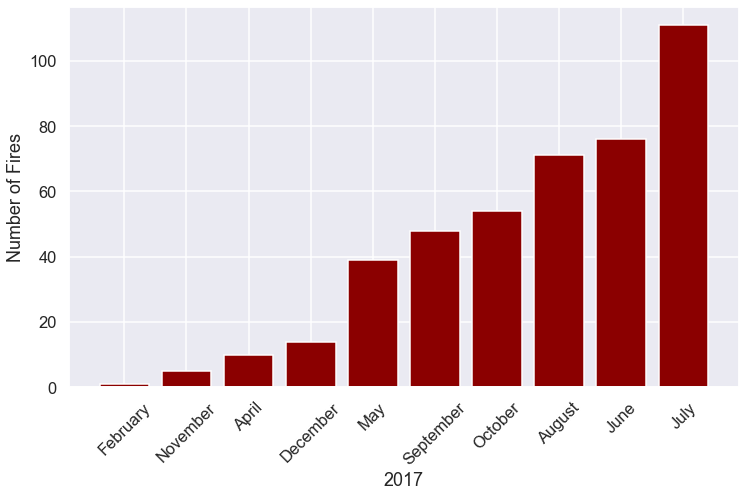

In [74]:
x = y17.StartMonth.value_counts()
x= x.sort_values(ascending=True)
plt.bar(x.index.values,x.values, color= 'darkred')
plt.xticks(rotation=45)
plt.xlabel('2017')
plt.ylabel('Number of Fires')
plt.savefig("Fig5.png", format='png')

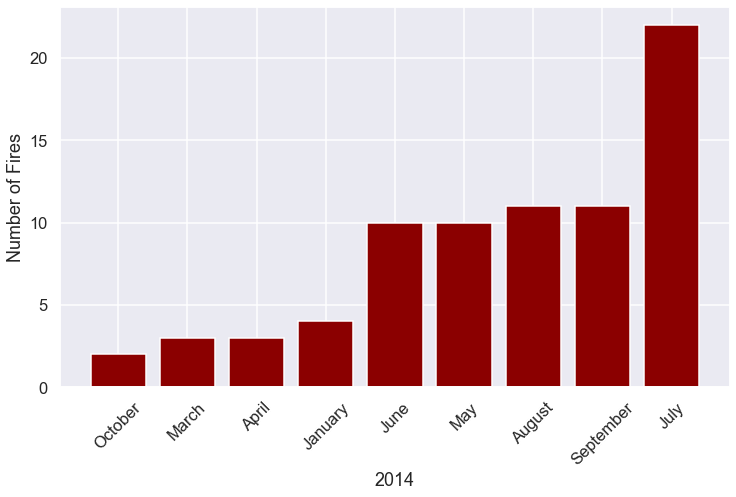

In [75]:
u = y14.StartMonth.value_counts()
u= u.sort_values(ascending=True)
plt.bar(u.index.values,u.values, color= 'darkred')
plt.xticks(rotation=45)
plt.xlabel('2014')
plt.ylabel('Number of Fires')
plt.savefig("Fig6.png", format='png')

In [12]:
def generateBaseMap(default_location=[36.7783,-119.4179], default_zoom_start=20):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [27]:
from folium.plugins import HeatMap
df_copy = fire[fire.StartMonth<=12].copy()
df_copy['count'] = 1
base_map = generateBaseMap()

In [28]:
df_month_list = []
for month in df_copy.StartMonth.sort_values().unique():
    df_month_list.append(df_copy.loc[df_copy.StartMonth == month, ['Lat', 'Lon', 'count']].groupby(['Lat', 'Lon']).sum().reset_index().values.tolist())

In [29]:
from folium.plugins import HeatMapWithTime
base_map = generateBaseMap(default_zoom_start=6)
HeatMapWithTime(df_month_list, radius=5, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map

In [31]:
base_map.save('maps.html')

In [33]:
temp.to_csv('temp.change.csv')

In [49]:
# convert tp csv then import os
fire.to_csv('fire.csv')
import os
import csv

In [52]:
# Function to convert a CSV to JSON 
# Takes the file paths as arguments 
def make_json(csvFilePath, jsonFilePath): 
	
	# create a dictionary 
	data = {} 
	
	# Open a csv reader called DictReader 
	with open(csvFilePath, encoding='utf-8') as csvf: 
		csvReader = csv.DictReader(csvf) 
		
		# Convert each row into a dictionary 
		# and add it to data 
		for rows in csvReader: 
			
			# Assuming a column named 'No' to 
			# be the primary key 
			key = rows[''] 
			data[key] = rows 

	# Open a json writer, and use the json.dumps() 
	# function to dump data 
	with open(jsonFilePath, 'w', encoding='utf-8') as jsonf: 
		jsonf.write(json.dumps(data, indent=4)) 
		
# Driver Code 

# Decide the two file paths according to your 
# computer system 
csvFilePath = os.path.join("fire.csv")
jsonFilePath = os.path.join('data.js')

# Call the make_json function 
make_json(csvFilePath, jsonFilePath)

# When converted add "var data = [

# ];"